## **Prediction of trends in Gender Pay Gap for OECD Countries** ##

### **Part-1: Exploring the Global Gender Pay Gap across countries for a period of 20 years**

### **(1) Importing Python Libraries & Setting the Environment**

In [2]:
import pandas as pd
import csv
from functools import reduce
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **(2) About Data**

* **Average Annual Wages-**To enable the comparison of levels and trends of average annual wages, OECD provides benchmark average wage estimates derived from the OECD National Accounts covering all economy sectors and all types of dependent employment. These averages shall provide a consistent time series and cross country comparisons. The average pay is obtained by dividing the total wage bill (“wages and salaries”, in the terminology of National Accounts) by the average number of employees in the total economy, also multiplying by the ratio of average usual weekly hours worked for full-time dependent employee in their main job to average usual weekly hours worked for all dependent employee in their main job.The resulting estimates correspond to average annual wages per full-time equivalent dependent employee.

* **Employee Compensation-** Earnings and Wages are "the total remuneration, in cash or in kind, payable to all persons counted on the payroll (including homeworkers), in return for work done during the accounting period". Employee Compensation is made up of these two components. Wages include social contributions, taxes etc. paid on behalf of employees while salaries are the actual social contributions payable by employers for their employees.Compensation of employees excludes any taxes payable by the employer on the wage and salary bill (e.g. payroll tax, fringe benefits tax).This indicator is broken down by agriculture (including forestry and fishing), industry and services. It is measured as percentage of gross value added.

* **Gender Pay Gap-** Gender pay Gap is calculated as a difference of the median earnings of men and women relative to the median earnings of men. Note that these are median earnings in full-time jobs and so are not affected by a widespread preference for part-time work by women (though men tend to work longer hours than women).

* **Wage Levels-** Wage levels are divided by low pay and high pay. The incidence of low pay refers to the share of workers earning less than two-thirds of median earnings . The incidence of high pay refers to the share of workers earning more than one-and-a-half time median earnings. This indicator is measures as a percentage.

### **(3) Importing Dataset**

In [3]:
#Getting the current working directory
os.getcwd()

direct='/resources/Projects/EDA/'
avg_pay='/resources/Projects/EDA/data/Average_Wages.csv'
emp_comp='/resources/Projects/EDA/data/Empcomp_industry.csv'
gender_pay='/resources/Projects/EDA/data/Gender_Pay_Gap.csv'
wage_lev='/resources/Projects/EDA/data/Wage_levels.csv'

#Reading the data 
#Read Annual Average Pay Dataset
avgpay=pd.read_csv(avg_pay)

#Read Employee Compensation Dataset
empcomp=pd.read_csv(emp_comp)

#Read Gender Pay Gap Dataset
gpg=pd.read_csv(gender_pay)
   
#Read Wage Levels Dataset
wglev=pd.read_csv(wage_lev)

avgpay.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,AVWAGE,TOT,USD,A,1990,36682.942425,NaN
1,AUS,AVWAGE,TOT,USD,A,1991,36776.247678,NaN
2,AUS,AVWAGE,TOT,USD,A,1992,37692.129358,NaN
3,AUS,AVWAGE,TOT,USD,A,1993,38112.690279,NaN
4,AUS,AVWAGE,TOT,USD,A,1994,38488.116634,NaN


### **(4) Cleaning Dataset**

In [4]:
#Drop columns with NaN
del avgpay['Flag Codes']
del empcomp['Flag Codes']
del gpg['Flag Codes']
del wglev['Flag Codes']

#Change col name and type
avgpay.rename(columns={'TIME':'Year','Value':'Avg_wage'}, inplace=True)
empcomp.rename(columns={'TIME':'Year','Value':'Compensation'}, inplace=True)
gpg.rename(columns={'TIME':'Year','Value':'Wage_Gap'}, inplace=True)
wglev.rename(columns={'TIME':'Year','Value':'Wage_level'}, inplace=True)

#Drop unwanted columns
avgpay.drop(["INDICATOR","SUBJECT","MEASURE","FREQUENCY"],axis=1,inplace=True)
empcomp.drop(["INDICATOR","MEASURE","FREQUENCY"],axis=1,inplace=True)
gpg.drop(["INDICATOR","SUBJECT","MEASURE","FREQUENCY"],axis=1,inplace=True)
wglev.drop(["INDICATOR","MEASURE","FREQUENCY"],axis=1,inplace=True)

#Ensure all dataset have the same time period
avgpay = avgpay[(avgpay['Year'] >= 1997) & (avgpay['Year'] <= 2017)]
empcomp = empcomp[(empcomp['Year'] >= 1997) & (empcomp['Year'] <= 2017)]
gpg = gpg[(gpg['Year'] >= 1997) & (gpg['Year'] <= 2017)]
wglev = wglev[(wglev['Year'] >= 1997) & (wglev['Year'] <= 2017)]

#Change Data type
avgpay['Avg_wage'] = avgpay['Avg_wage'].apply(lambda x: int(x) if x == x else "")
empcomp['Compensation'] = empcomp['Compensation'].apply(lambda x: int(x) if x == x else "")
gpg['Wage_Gap'] = gpg['Wage_Gap'].apply(lambda x: int(x) if x == x else "")
wglev['Wage_level'] = wglev['Wage_level'].apply(lambda x: int(x) if x == x else "")

In [5]:
#Join the data frames
#frames=[avgpay,empcomp,gpg,wglev]
#df1 = reduce(lambda  left,right: pd.merge(left,right, on=['LOCATION', 'Year'], how='outer'), frames)
#df1.head()

### **(5) Data Visualization**

Exploring each indicator to visualize their trends across a period of 20 years for the OECD Countries. 

#### **(a) Average Annual Wages across OECD Countries for past 20 years**

In [6]:
#Understanding the distribution of the variable Average Annual Wage
avgpay['Avg_wage'].describe()

count      735.000000
mean     35957.246259
std      12927.695296
min       8490.000000
25%      25157.500000
50%      37318.000000
75%      45802.000000
max      63062.000000
Name: Avg_wage, dtype: float64

In [7]:
#Understanding the distribution of the variable Average Annual Wage across the years
avgpay.groupby(['LOCATION']).max()["Avg_wage"]

LOCATION
AUS    49988
AUT    50348
BEL    50583
CAN    47673
CHE    62616
CHL    26218
CZE    25372
DEU    47585
DNK    51826
ESP    40716
EST    24335
FIN    43138
FRA    43755
GBR    44897
GRC    33422
HUN    22575
IRL    52074
ISL    61786
ISR    35067
ITA    37987
JPN    41566
KOR    35191
LTU    24286
LUX    63062
LVA    23683
MEX    16362
NLD    53294
NOR    51662
NZL    40042
POL    27046
PRT    27030
SVK    24327
SVN    34932
SWE    42392
USA    60691
Name: Avg_wage, dtype: int64

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


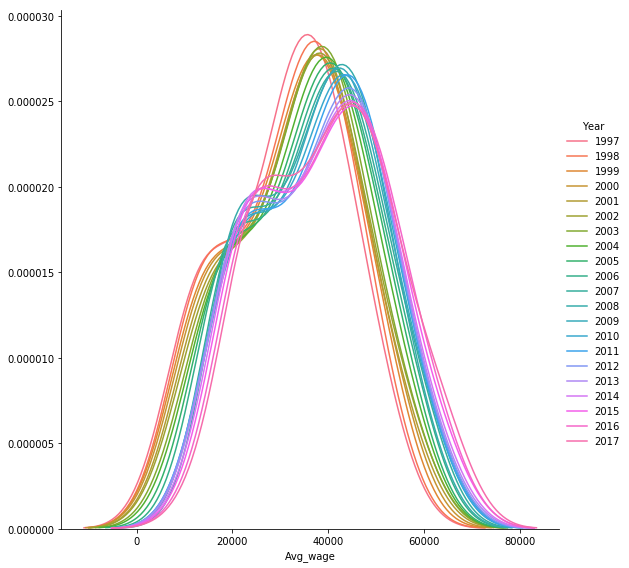

In [8]:
#Visualizing the distribution of average annual pays over the years using Joint Plot with 
di = sns.FacetGrid(avgpay, hue="Year", height=8).map(sns.kdeplot, "Avg_wage")
di.add_legend()
#plt.show()
di.savefig('AvgPay.png')

#### *Interpretation of the Distribution Plots*
Looking at the overall distribution of Global Annual Average Wages, the mean value of average annual pay for the last 20 years is USD 35,957.25 with the minimum average annual pay of USD 8,490. Moreover, the annual average wage for the past twenty years has been seeing an increasing trend with its maximum value at USD 63,062.0 in 2017. Using the kernel density plot (KDE), I get a smooth line curve for the average annual wages across each year.

In [9]:
#Bubble chart indicating the distribution of Average Annual Wages over the period of 20 years
#norm_avgpay = (avgpay['Avg_wage'] - avgpay['Avg_wage'].min()) / (avgpay['Avg_wage'].max() - avgpay['Avg_wage'].min())

#ax0 = avgpay.plot(kind='scatter',
#                    x='Year',
#                    y='Avg_wage',
#                    figsize=(14, 10),
#                    alpha=0.5,                  # transparency
#                    color='red',
#                    s=norm_avgpay * 1000 + 10,  # pass in weights 
#                    xlim=(1996, 2018)
#                  )
#ax0.set_ylabel('Annual Average Pay($)')
#ax0.set_title('Annual Average Pay from 1997 - 2017')

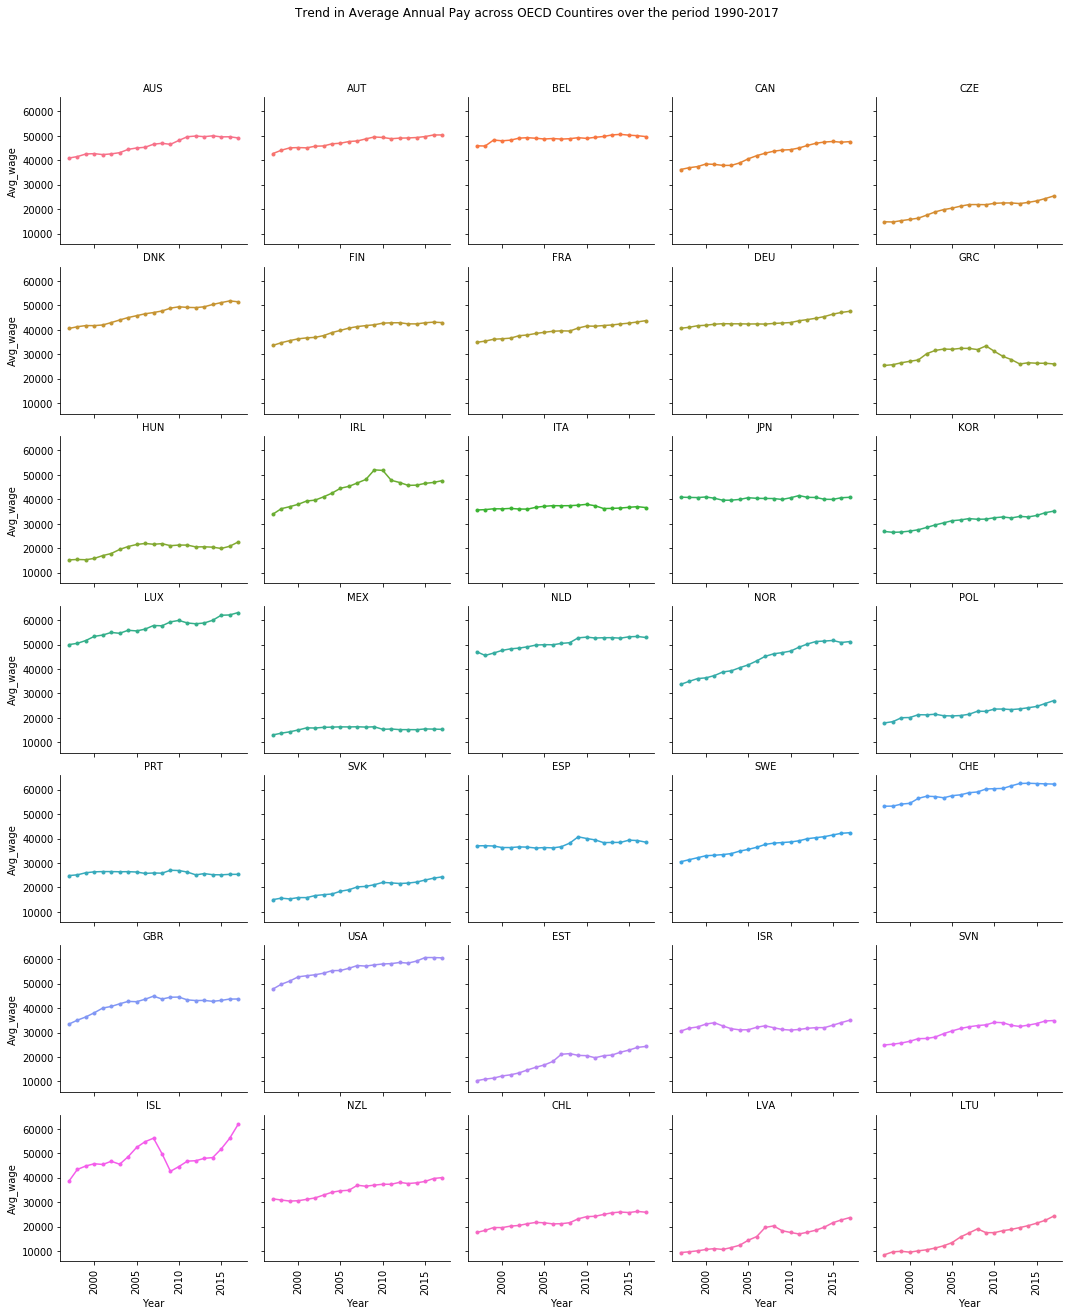

In [10]:
#Visualizing the trend in the average annual pays across countries 
g = sns.FacetGrid(avgpay, col='LOCATION', hue='LOCATION', col_wrap=5, )
g = g.map(plt.plot, 'Year', 'Avg_wage',marker=".")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
#g = g.map(plt.fill_between, 'Year', 'Avg_wage', alpha=0.3).set_titles("{col_name} LOCATION")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92, bottom=0.15)
g = g.fig.suptitle('Trend in Average Annual Pay across OECD Countires over the period 1990-2017')
#plt.show()
fig= g.get_figure()
fig.savefig('avgpay_trend.png')

In [11]:
#Identifying the top countries with highest average annual pay in last twenty years
top5=avgpay.nlargest(10,['Year','Avg_wage'])
top5

,LOCATION,Year,Avg_wage
431,LUX,2017,63062
669,CHE,2017,62282
822,ISL,2017,61786
725,USA,2017,60558
487,NLD,2017,52876
162,DNK,2017,51466
515,NOR,2017,51212
55,AUT,2017,50348
83,BEL,2017,49674
27,AUS,2017,49125


In [12]:
#Identifying the top countries with lowest average annual pay in last twenty years
#avgpay.groupby('Year').apply(lambda avgpay:avgpay.nsmallest(10,['Avg_wage']))

#### *Top 10 countries with Highest and lowest Annual Average Wage & their overall trends*
The countries with highest Annual Average Wage include the United States, Australia and the developed nations of Europe such as Denmark, Netherlands, Austria, Switzerland, Norway, Belgium and Iceland for the year 2017 while the countries with lowest annual average pay for the same year include Mexico, Hungary,Latvia, Lithuania, Slovakia, Estonia, Czechia, Chile, Portugal and Greece.

#### **(b) Employee Compensation across OECD Countries for past 20 years**

In [13]:
#Summary of Employee Compensation across OECD Countries for 20 years
empcomp['Compensation'].describe()

count    3195.000000
mean       25.198748
std        19.954086
min         0.000000
25%         7.000000
50%        24.000000
75%        43.000000
max        67.000000
Name: Compensation, dtype: float64

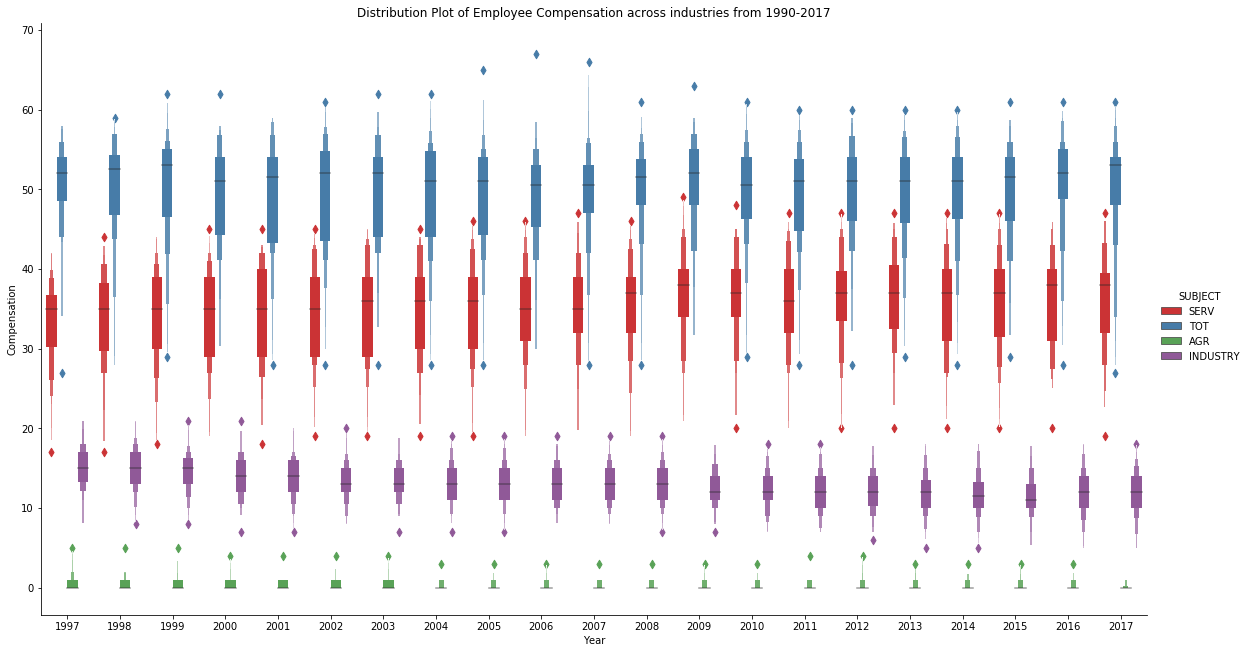

In [14]:
#Visualizing the Employee Compensation across countries 
di=sns.catplot(x="Year", y="Compensation", hue="SUBJECT", data=empcomp, kind="boxen", palette="Set1", height=9, aspect=1.8)
plt.title("Distribution Plot of Employee Compensation across industries from 1990-2017")
#plt.show()
#dist= di.get_figure()
di.savefig('EmpComp.png')

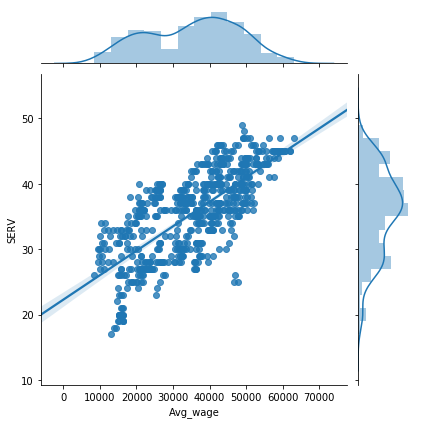

In [26]:
#Joint Plot of Annual Avergae Wage and Employee Compensation
comp = pd.pivot_table(empcomp, values='Compensation', index=['LOCATION', 'Year'], columns=['SUBJECT'])
comp.head()
md1 = pd.merge(left=avgpay,right=comp, how='left', left_on=['LOCATION','Year'], right_on=['LOCATION','Year'])
md1.head()
md1.tail()
g = sns.jointplot(x="Avg_wage", y="SERV", kind="reg", data=md1)
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)

#### *Looking for Correlation between Annual Average Pay and Employee Compensation across different Sectors*
If we look at the regression plots for Agriculture and Industrial Sector, there seem to exist a negative correlation between annual average pay and employee compensation. Whereas, for Industry there is a positive trend between the Annual Average Pay and Employee Compensation.

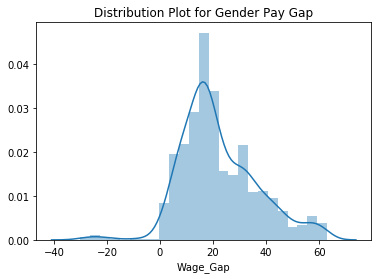

In [16]:
#Distribution of the gender pay gap 
gpg.describe()
di=sns.distplot(gpg.Wage_Gap.dropna())
plt.title("Distribution Plot for Gender Pay Gap")
#plt.show()
dist= di.get_figure()
dist.savefig('GenderPayGap.png')

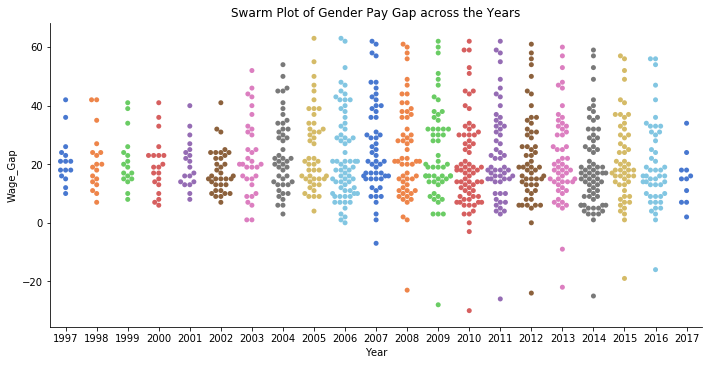

In [17]:
#Visualizing the underlying distribution of Gender Pay Gap Yearly
ax = sns.catplot(x="Year", y="Wage_Gap", data=gpg, palette="muted", kind="swarm", height=5, aspect=2)
plt.title("Swarm Plot of Gender Pay Gap across the Years")
#plt.show()
dist= di.get_figure()
dist.savefig('gpg_swarmplot.png')

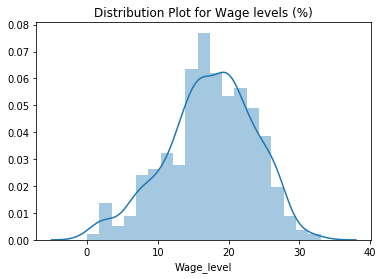

In [18]:
#Visualizing the wage levels across OECD countries 
wglev.describe()
di=sns.distplot(wglev.Wage_level.dropna())
plt.title("Distribution Plot for Wage levels (%)")
#plt.show()
dist= di.get_figure()
dist.savefig('Wagelevel.png')

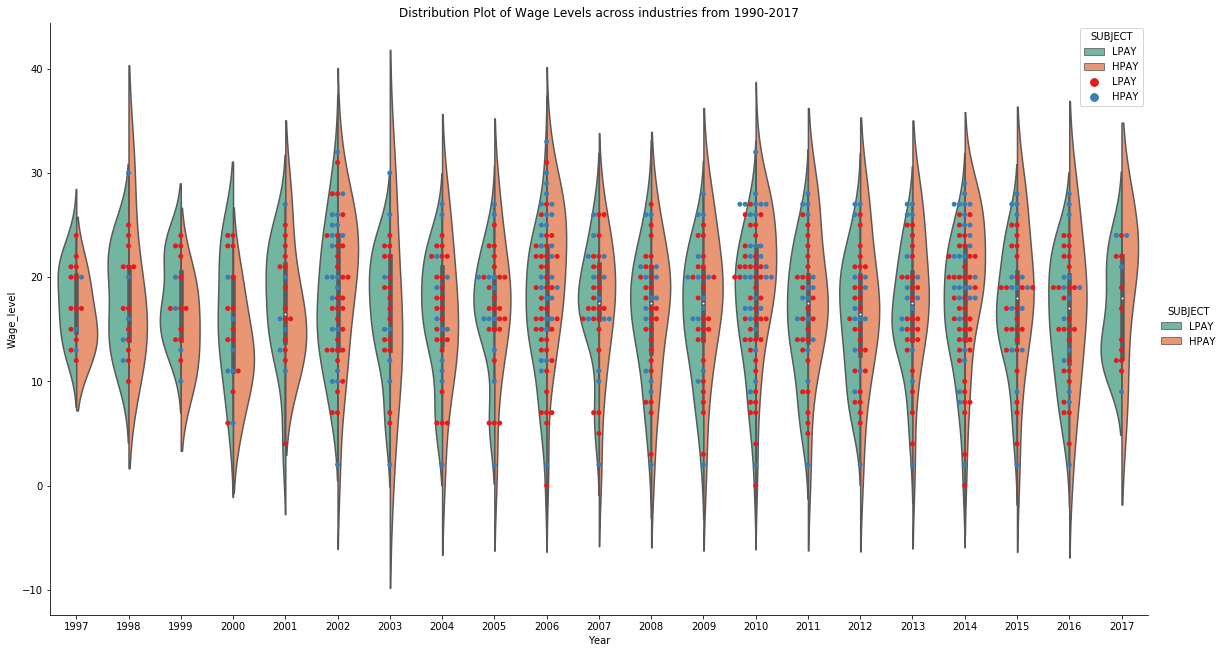

In [19]:
#Visualizing the Wage Level across countries 
di=sns.catplot(x="Year", y="Wage_level", hue="SUBJECT", data=wglev, kind="violin", split=True, palette="Set2", height=9, aspect=1.8)
sns.swarmplot(x="Year", y="Wage_level", hue="SUBJECT", data=wglev, palette="Set1")  
plt.title("Distribution Plot of Wage Levels across industries from 1990-2017")
#plt.show()
#dist= di.get_figure()
di.savefig('wglevel_count.png')